# 02 - General Linear Least Squares Method

---

## 1. Introduction

Fitting data to a straight line is simple, but what if our data follows a more complex trend, like a parabola or a trigonometric curve? The least squares method can be generalized to fit *any* function that is **linear in its coefficients**.

We want to approximate our data $f(x)$ with a general function $g(x)$ of the form:

$$ g(x) = c_0\Theta_0(x) + c_1\Theta_1(x) + \cdots + c_n\Theta_n(x) $$

Where:
- $c_j$ are the unknown **coefficients** we need to find.
- $\Theta_j(x)$ are the **basis functions**, which are known functions of $x$.

**Example Basis Functions:**
- **Polynomial:** $\Theta_0 = 1, \Theta_1 = x, \Theta_2 = x^2, \ldots$
- **Trigonometric:** $\Theta_0 = 1, \Theta_1 = \cos(x), \Theta_2 = \sin(x), \ldots$
- **Other:** $\Theta_0 = e^x, \Theta_1 = \log(x), \ldots$

The method is called **Linear** Least Squares because the function $g(x)$ is a linear combination of the coefficients $c_j$. The basis functions $\Theta_j(x)$ themselves can be highly non-linear.

## 2. Deriving the General Normal Equations

As before, we want to minimize the sum of squared residuals, $S$:
$$ S(c_0, \ldots, c_n) = \sum_{i=1}^{m} \left[ f(x_i) - g(x_i) \right]^2 = \sum_{i=1}^{m} \left[ f(x_i) - \sum_{j=0}^{n} c_j\Theta_j(x_i) \right]^2 $$

To minimize $S$, we take the partial derivative with respect to *each* coefficient $c_k$ and set it to zero.
$$ \frac{\partial S}{\partial c_k} = \sum_{i=1}^{m} 2 \left[ f(x_i) - \sum_{j=0}^{n} c_j\Theta_j(x_i) \right] \cdot (-\Theta_k(x_i)) = 0 $$

Rearranging this gives:
$$ \sum_{i=1}^{m} \left( \sum_{j=0}^{n} c_j\Theta_j(x_i) \right) \Theta_k(x_i) = \sum_{i=1}^{m} f(x_i)\Theta_k(x_i) $$

This single equation can be complex. Let's simplify it using **inner product notation**. For two functions $u(x)$ and $v(x)$ evaluated at our data points, let's define their inner product as:
$$ \langle u, v \rangle = \sum_{i=1}^{m} u(x_i)v(x_i) $$

With this notation, our equation for each $k$ (from $0$ to $n$) becomes:
$$ \sum_{j=0}^{n} c_j \langle \Theta_j, \Theta_k \rangle = \langle f, \Theta_k \rangle $$

This is a system of $(n+1)$ linear equations for the $(n+1)$ unknown coefficients $c_0, \ldots, c_n$. This system is called the **Normal Equations**.

## 3. The Normal Equations System

We can write the normal equations in matrix form $Ac = b$, where:

- $c$ is the vector of unknown coefficients $[c_0, c_1, \ldots, c_n]^T$.
- The matrix $A$ is an $(n+1) \times (n+1)$ matrix whose entries are $A_{kj} = \langle \Theta_k, \Theta_j \rangle$.
- The vector $b$ is an $(n+1) \times 1$ vector whose entries are $b_k = \langle f, \Theta_k \rangle$.

For $n=2$ (e.g., a quadratic fit `g(x) = c_0*Theta_0 + c_1*Theta_1 + c_2*Theta_2`), the system is:
$$ 
\begin{pmatrix}
\langle \Theta_0, \Theta_0 \rangle & \langle \Theta_0, \Theta_1 \rangle & \langle \Theta_0, \Theta_2 \rangle \\
\langle \Theta_1, \Theta_0 \rangle & \langle \Theta_1, \Theta_1 \rangle & \langle \Theta_1, \Theta_2 \rangle \\
\langle \Theta_2, \Theta_0 \rangle & \langle \Theta_2, \Theta_1 \rangle & \langle \Theta_2, \Theta_2 \rangle
\end{pmatrix}
\begin{pmatrix} c_0 \\ c_1 \\ c_2 \end{pmatrix} = 
\begin{pmatrix} \langle f, \Theta_0 \rangle \\ \langle f, \Theta_1 \rangle \\ \langle f, \Theta_2 \rangle \end{pmatrix}
$$

## 4. Example: Quadratic Fit

Let's use the same data from the previous notebook, but this time fit it to a **quadratic polynomial**:
$$ g(x) = c_0 + c_1x + c_2x^2 $$

Our basis functions are:
- $\Theta_0(x) = 1$
- $\Theta_1(x) = x$
- $\Theta_2(x) = x^2$

| $x_i$ | 0 | 0.25 | 0.5 | 0.75 | 1.0 |
|---|---|---|---|---|---|
| $f(x_i)$ | 1 | 1.284 | 1.6487 | 2.117 | 2.7183 |


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Our data
x_i = np.array([0, 0.25, 0.5, 0.75, 1.0])
f_i = np.array([1, 1.284, 1.6487, 2.117, 2.7183])

# Define the basis functions
theta_0 = lambda x: 1
theta_1 = lambda x: x
theta_2 = lambda x: x**2

# Evaluate basis functions at data points
T0 = theta_0(x_i)
T1 = theta_1(x_i)
T2 = theta_2(x_i)

# Define the inner product
def inner_product(u, v):
    return np.sum(u * v)

# Build the 3x3 matrix A (A_kj = <Theta_k, Theta_j>)
A = np.array([
    [inner_product(T0, T0), inner_product(T0, T1), inner_product(T0, T2)],
    [inner_product(T1, T0), inner_product(T1, T1), inner_product(T1, T2)],
    [inner_product(T2, T0), inner_product(T2, T1), inner_product(T2, T2)]
])

# Build the 3x1 vector b (b_k = <f, Theta_k>)
b = np.array([
    inner_product(f_i, T0),
    inner_product(f_i, T1),
    inner_product(f_i, T2)
])

print("--- Quadratic Fit ---")
print("Normal Equations Matrix (A):\n", A)
print("\nNormal Equations Vector (b):\n", b)

# Solve for c = [c0, c1, c2]
c = np.linalg.solve(A, b)
c0, c1, c2 = c[0], c[1], c[2]

print(f"\nCoefficients (Manual): c0 = {c0:.4f}, c1 = {c1:.4f}, c2 = {c2:.4f}")


--- Quadratic Fit ---
Normal Equations Matrix (A):
 [[1.        2.5       1.875    ]
 [2.5       1.875     1.5625   ]
 [1.875     1.5625    1.3828125]]

Normal Equations Vector (b):
 [8.768     5.4514    4.4015375]

Coefficients (Manual): c0 = -0.3953, c1 = 5.7431, c2 = -2.7703


Coefficients (polyfit): c0 = 1.0051, c1 = 0.8642, c2 = 0.8437


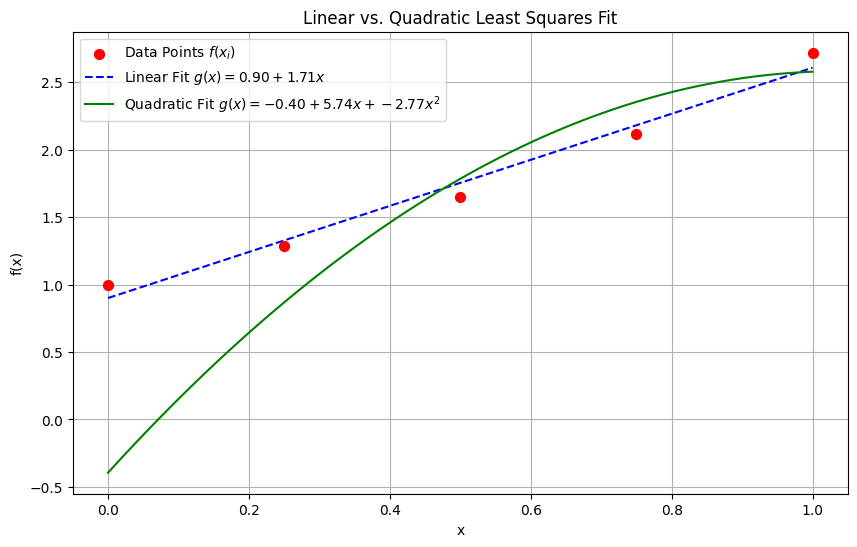

Note: The data appears to be from the function f(x) = e^x.
The quadratic fit is visibly much closer to the data points than the linear fit.


In [2]:
# --- 5. The Easy Way (Using `numpy.polyfit`) ---

# Fit a 2nd-degree polynomial (quadratic)
# Coeffs are returned from highest power (c2, c1, c0)
c_polyfit = np.polyfit(x_i, f_i, 2)
c2_easy, c1_easy, c0_easy = c_polyfit[0], c_polyfit[1], c_polyfit[2]

print(f"Coefficients (polyfit): c0 = {c0_easy:.4f}, c1 = {c1_easy:.4f}, c2 = {c2_easy:.4f}")

# --- 6. Visualization ---

# Get the linear fit from the previous notebook for comparison
c_linear = np.polyfit(x_i, f_i, 1)
g_linear = lambda x: c_linear[1] + c_linear[0] * x

# Create the quadratic approximation function g(x)
g_quad = lambda x: c0 + c1 * x + c2 * x**2

# Generate points for the best-fit lines
x_line = np.linspace(min(x_i), max(x_i), 100)
f_line_linear = g_linear(x_line)
f_line_quad = g_quad(x_line)

plt.figure(figsize=(10, 6))
plt.scatter(x_i, f_i, color='red', s=50, zorder=5, label='Data Points $f(x_i)$')
plt.plot(x_line, f_line_linear, color='blue', linestyle='--', label=f'Linear Fit $g(x) = {c_linear[1]:.2f} + {c_linear[0]:.2f}x$')
plt.plot(x_line, f_line_quad, color='green', label=f'Quadratic Fit $g(x) = {c0:.2f} + {c1:.2f}x + {c2:.2f}x^2$')

plt.title('Linear vs. Quadratic Least Squares Fit')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

print("Note: The data appears to be from the function f(x) = e^x.")
print(f"The quadratic fit is visibly much closer to the data points than the linear fit.")